In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load the data
- Use the function defined in last week's notebook to load the MovieLens-small dataset.
- Use `pd.read_csv()` to load `ratings.csv`
- Show basic information of the dataset:
    - Shape
    - Feature names
    - Feature data types
    - First 5 rows
    - Statistics of numerical features (Use .describe())
    - Frequencies of categorical features (Use .value_counts())
    - Any missing values? (Use pd.isnull())

In [2]:
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [3]:
file_path = "Data/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)

Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


In [10]:
ratings_df = pd.read_csv("Data/ml-latest-small/ratings.csv", delimiter=",")
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [ ]:
# Print the shape of the data frame



In [7]:
# Print the feature names



In [ ]:
# Print the data types of features



In [31]:
# Add a "Year" column that represents the year of the rating (Convert datastamp to datetime)
from datetime import datetime
ratings_df['DT'] = ratings_df['timestamp'].apply(datetime.fromtimestamp)
def datetime_to_year(x):
    return x.year
ratings_df['Year'] = ratings_df['DT'].apply(datetime_to_year)

In [ ]:
# Use .describe() to show the statistics of numerical features



In [ ]:
# Use .value_counts() to show the frequencies of ratings and years



In [ ]:
# Use pd.isnull() to find the number of missing values for each column



## 2. Analyzing the rating data

We will continue the data analysis from last week.

### A. The distribution of the ratings
- Show the frequency of each rating (0.5 - 5.0)
- Show the rating frequencies in 2018 (First create a sub DataFrame containing only 2018 ratings)
- Show the rating frequencies in 2003
- Compare ratings distributions in 2003 and 2018.

Overall rating frequencies:
 4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


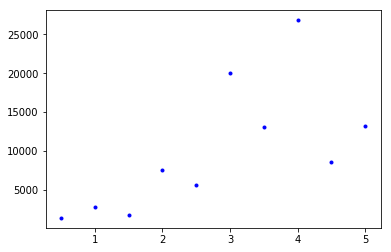

In [16]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print("Overall rating frequencies:\n", rating_frequencies)
# print("Overall rating frequencies:\n", rating_frequencies.sort_index())
plt.plot(rating_frequencies.index,
         rating_frequencies.values,
         'b.')
# plt.bar(rating_frequencies.index,
#         rating_frequencies.values,
#         )

In [19]:
# Find the slice that correspond to 2018 ratings
index_2018 = (ratings_df['Year'] == 2018)
# print(index_2018)

# Extract all 2018 ratings
ratings_2018 = ratings_df[index_2018]
ratings_2018.head()
print("Shape of the sub data frame:", ratings_2018.shape)
rating_freq_2018 = ratings_2018['rating'].value_counts()
print(rating_freq_2018)

Shape of the sub data frame: (6413, 5)
4.0    1345
3.5     971
3.0     857
4.5     770
5.0     763
2.5     556
2.0     521
1.5     268
0.5     182
1.0     180
Name: rating, dtype: int64


Text(0,0.5,'Relative Frequency')

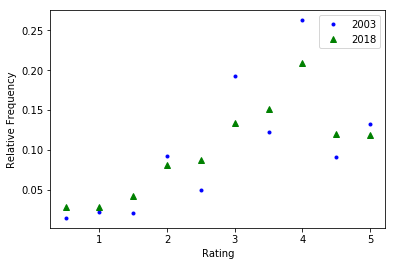

In [23]:
# What are the rating frequencies in 2003?
rating_freq_2003 = ratings_df[ratings_df['Year'] == 2003]['rating'].value_counts()

# Plot frequency comparison
plt.plot(rating_freq_2003 / np.sum(rating_freq_2003), 'b.', label="2003")
plt.plot(rating_freq_2018 / np.sum(rating_freq_2018), 'g^', label="2018")
plt.legend()
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")

**Conclusion:** The ratings distribution in 2003 is quite similar to the distribution in 2018. Most ratings are between 3.0 and 4.0.

### B. How consistant are the average ratings over time?
- Find a list of years during which ratings are given.
- For each year, extract the ratings given in that year, and then calculate the average rating
- Plot the average rating against the year number.

In [24]:
# Get the list of all years in the dataset
# set(ratings_df['Year'])
years = np.sort(ratings_df['Year'].unique())
print(years)

[1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [25]:
# Calculate the average rating for each year
all_avg_ratings = []
for year in years:
    index_year = (ratings_df['Year'] == year)
    ratings_year = ratings_df[index_year]
    avg_rating = np.mean(ratings_year['rating'])
    all_avg_ratings.append(avg_rating)
print(all_avg_ratings)

[3.5359271523178806, 3.7275574112734864, 3.4358974358974357, 3.772447724477245, 3.39250571513766, 3.5122386537480876, 3.606958021851639, 3.4993771798704536, 3.506099420555047, 3.4315327713745054, 3.488060068931561, 3.3088876388693573, 3.6589714285714288, 3.3886066763425253, 3.4634941329856583, 3.7840236686390534, 3.6413230240549828, 3.8774038461538463, 3.5107713690062545, 3.513830108827086, 3.686334477099806, 3.3487748384737293, 3.3891314517386557]


(0, 5)

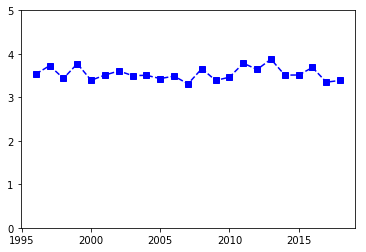

In [28]:
# Plot
plt.plot(years, all_avg_ratings, 'bs--')
plt.ylim([0, 5])

**Conclusion:** No significant rating inflations

### C. How fast does the movie library grow?
- For each year, extract all ratings given **in that year or before**.
- Find the number of unique movies in the subset.
- Plot the number of movies against the year number

**Discussion:** How does the number of movies vary?

### D. How fast does the user base grow?
- For each year, extract all ratings given in that year or before.
- Find the number of unique users in the subset.
- Plot the number of users against the year number.

**Discussion:** How does the user base grow?

### E. Time of ratings

In [32]:
# When was the first rating given?
ratings_df['DT'].min()

Timestamp('1996-03-29 13:36:55')

In [33]:
# When was the last rating given?
ratings_df['DT'].max()

Timestamp('2018-09-24 10:27:30')

(0, 24)

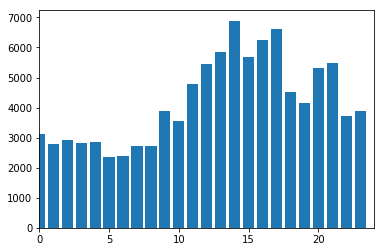

In [42]:
# During what time of day do most users give ratings?

ratings_df['Hour'] = ratings_df['DT'].dt.hour
hour_freq = ratings_df['Hour'].value_counts().sort_index()
plt.bar(hour_freq.index, hour_freq.values)
plt.xlim(0, 24)

**Conclusion:**

### F. Popular Movies

In [ ]:
# Which movie received the highest number of ratings?



In [29]:
# Load the movies.csv file as a second data frame movies_df


# Find the name of the movie with highest number of ratings.

In [ ]:
# Which movie received the largest amount of 5.0?


# Find the name of the movie



In [44]:
# Which five movie has the highest average rating?


# Find the name of the movies


# How many ratings do these movies receive?




## 3. Working with multiple data frames

In [60]:
movies_df = pd.read_csv("Data/ml-latest-small/movies.csv", delimiter=",")
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [61]:
# Create a "AvgRating" column: for each movie, fill in its average rating


,movieId,title,genres,AvgRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615


In [62]:
# Create a "NumRatings" column: for each movie, fill in the number ratings


,movieId,title,genres,AvgRating,NumRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0


In [63]:
# Extract movies with ratings >= 100


In [64]:
# Use .sort_values() to sort the data frame according to the AvgRating column


/home/liang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,movieId,title,genres,AvgRating,NumRatings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218.0


In [68]:
# Extract the comedy movies


,movieId,title,genres,AvgRating,NumRatings
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394,142.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.197068,307.0
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.183333,120.0
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.164134,329.0
863,1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,4.161765,136.0


In [ ]:
# Find the 5 top-rated comedies


In [80]:
# Load tags.csv


In [81]:
# For Movie #1: Toy Story, find all tags related to it.


In [82]:
# Create a string that contains all the tags for Toy Story, separated by '|'


In [ ]:
# Create a "Tags" column in the movies dataframe, fill in the string that contains 
# each movie's tags

